In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [8]:
train_data=pd.read_excel('flights.xlsx')

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### as less missing values,I can directly drop these

In [13]:
train_data.dropna(inplace=True)

In [14]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.


    dt.day method will extract only day of that date
    dt.month method will extract only month of that date

In [16]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    

In [17]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [19]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [21]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [22]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [23]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [25]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [26]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [27]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [28]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(train_data,'Dep_Time')

In [29]:
# Extracting Minutes
extract_min(train_data,'Dep_Time')

In [23]:
# Now we can drop Dep_Time as it is of no use
drop_column(train_data,'Dep_Time')

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [25]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [33]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [32]:
'2h 50m'.split(' ')

['2h', '50m']

#### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [34]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [35]:
train_data['Duration']=duration

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [31]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [38]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [39]:
def min(x):
    return x.split(' ')[1][0:-1]

In [40]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,4,45


In [42]:
train_data.drop('Duration',axis=1,inplace=True)

In [43]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,2 stops,No info,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,1 stop,No info,13302,3,1,16,50,4,45


In [44]:
train_data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Duration_hours             object
Duration_mins              object
dtype: object

In [45]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [46]:
train_data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Duration_hours              int64
Duration_mins               int64
dtype: object

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [47]:
train_data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Duration_hours              int64
Duration_mins               int64
dtype: object

In [48]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [49]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Dep_Time',
 'Arrival_Time',
 'Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data


#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [50]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [51]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

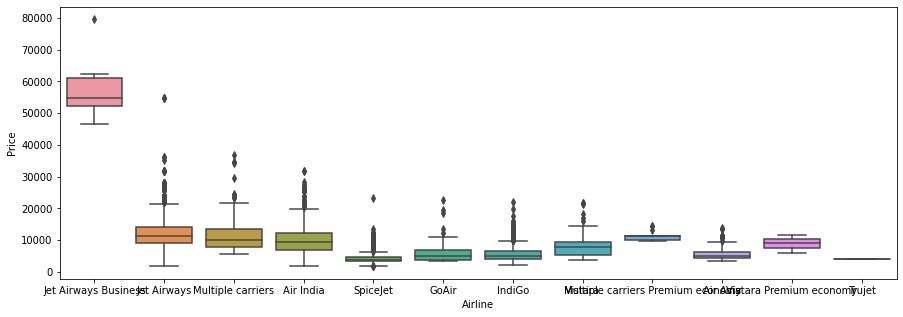

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

##### Conclusion-->  From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

#### Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

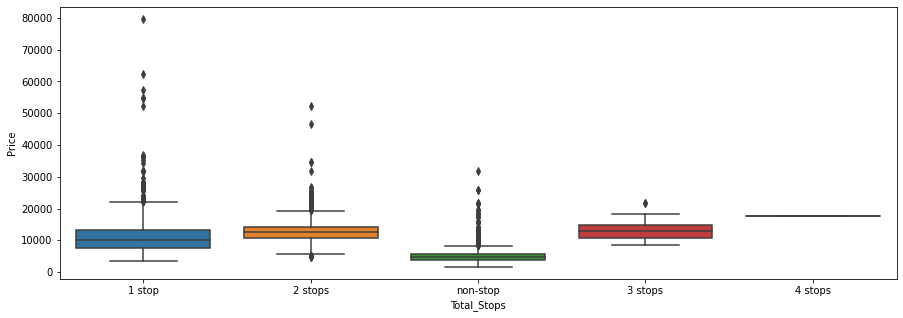

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

In [54]:
len(categorical['Airline'].unique())

12

In [55]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [56]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

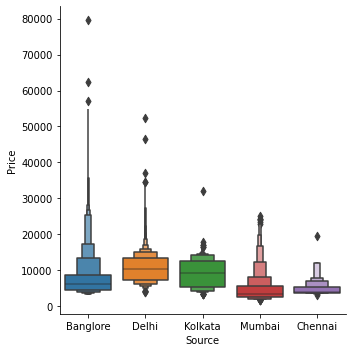

In [57]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [58]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [59]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [60]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [61]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [62]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

/var/folders/8q/s8p7y9td1wv7nf_pqwhh5xd00000gn/T/ipykernel_57179/2976530867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→').str[0]
/var/folders/8q/s8p7y9td1wv7nf_pqwhh5xd00000gn/T/ipykernel_57179/2976530867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→').str[1]
/var/folders/8q/s8p7y9td1wv7nf_pqwhh5xd00000gn/T/ipykernel_57179/2976530867.py:3: SettingWithCopyWarning: 
A value is trying

In [63]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [59]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [64]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [65]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 29 categories 

Route_4 has total 13 categories 

Route_5 has total 5 categories 



In [63]:
### as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

ModuleNotFoundError: No module named 'sklearn'

In [67]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [68]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

NameError: name 'encoder' is not defined

In [69]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [70]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

/Users/yrzhang/.virtualenvs/data/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,NaN,NaN


In [70]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [72]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [73]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [74]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

/var/folders/8q/s8p7y9td1wv7nf_pqwhh5xd00000gn/T/ipykernel_57179/2995340578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [75]:
train_data[cont_col]

,Dep_Time,Arrival_Time,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,2022-01-14 22:20:00,2022-03-22 01:10:00,3897,24,3,22,20,2,50
1,2022-01-14 05:50:00,2022-01-14 13:15:00,7662,5,1,5,50,7,25
2,2022-01-14 09:25:00,2022-06-10 04:25:00,13882,6,9,9,25,19,0
3,2022-01-14 18:05:00,2022-01-14 23:30:00,6218,5,12,18,5,5,25
4,2022-01-14 16:50:00,2022-01-14 21:35:00,13302,3,1,16,50,4,45
...,...,...,...,...,...,...,...,...,...
10678,2022-01-14 19:55:00,2022-01-14 22:25:00,4107,4,9,19,55,2,30
10679,2022-01-14 20:45:00,2022-01-14 23:20:00,4145,27,4,20,45,2,35
10680,2022-01-14 08:20:00,2022-01-14 11:20:00,7229,27,4,8,20,3,0
10681,2022-01-14 11:30:00,2022-01-14 14:10:00,12648,3,1,11,30,2,40


In [77]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Dep_Time,Arrival_Time,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,BLR,DEL,NaN,NaN,NaN,0,...,1,2022-01-14 22:20:00,2022-03-22 01:10:00,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2,CCU,IXR,BBI,BLR,NaN,1,...,0,2022-01-14 05:50:00,2022-01-14 13:15:00,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,DEL,LKO,BOM,COK,NaN,0,...,0,2022-01-14 09:25:00,2022-06-10 04:25:00,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,CCU,NAG,BLR,NaN,NaN,0,...,0,2022-01-14 18:05:00,2022-01-14 23:30:00,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,BLR,NAG,DEL,NaN,NaN,0,...,1,2022-01-14 16:50:00,2022-01-14 21:35:00,13302,3,1,16,50,4,45


In [78]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [79]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Dep_Time,Arrival_Time,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,0,BLR,DEL,NaN,NaN,NaN,0,0,1,0,...,1,2022-01-14 22:20:00,2022-03-22 01:10:00,3897,24,3,22,20,2,50
1,2,CCU,IXR,BBI,BLR,NaN,1,0,0,0,...,0,2022-01-14 05:50:00,2022-01-14 13:15:00,7662,5,1,5,50,7,25
2,2,DEL,LKO,BOM,COK,NaN,0,0,0,1,...,0,2022-01-14 09:25:00,2022-06-10 04:25:00,13882,6,9,9,25,19,0
3,1,CCU,NAG,BLR,NaN,NaN,0,0,1,0,...,0,2022-01-14 18:05:00,2022-01-14 23:30:00,6218,5,12,18,5,5,25
4,1,BLR,NAG,DEL,NaN,NaN,0,0,1,0,...,1,2022-01-14 16:50:00,2022-01-14 21:35:00,13302,3,1,16,50,4,45


In [80]:
pd.set_option('display.max_columns',35)

In [81]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Time,Arrival_Time,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,0,BLR,DEL,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2022-01-14 22:20:00,2022-03-22 01:10:00,3897,24,3,22,20,2,50
1,2,CCU,IXR,BBI,BLR,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-01-14 05:50:00,2022-01-14 13:15:00,7662,5,1,5,50,7,25
2,2,DEL,LKO,BOM,COK,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2022-01-14 09:25:00,2022-06-10 04:25:00,13882,6,9,9,25,19,0
3,1,CCU,NAG,BLR,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-01-14 18:05:00,2022-01-14 23:30:00,6218,5,12,18,5,5,25
4,1,BLR,NAG,DEL,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2022-01-14 16:50:00,2022-01-14 21:35:00,13302,3,1,16,50,4,45


In [82]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Dep_Time', 'Arrival_Time', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

### outlier detection

In [83]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

/Users/yrzhang/.virtualenvs/data/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yrzhang/.virtualenvs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x1440 with 0 Axes>

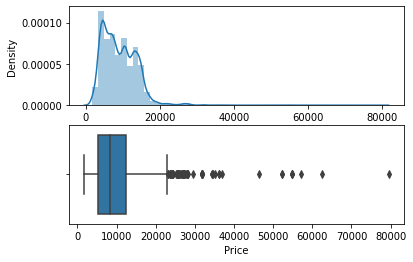

In [84]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

#### dealing with Outliers

In [85]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

/Users/yrzhang/.virtualenvs/data/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yrzhang/.virtualenvs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x1440 with 0 Axes>

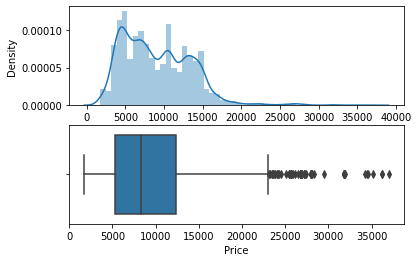

In [86]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [86]:
### separate your independent & dependent data

In [87]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Time,Arrival_Time,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,0,BLR,DEL,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2022-01-14 22:20:00,2022-03-22 01:10:00,24,3,22,20,2,50
1,2,CCU,IXR,BBI,BLR,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-01-14 05:50:00,2022-01-14 13:15:00,5,1,5,50,7,25
2,2,DEL,LKO,BOM,COK,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2022-01-14 09:25:00,2022-06-10 04:25:00,6,9,9,25,19,0
3,1,CCU,NAG,BLR,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2022-01-14 18:05:00,2022-01-14 23:30:00,5,12,18,5,5,25
4,1,BLR,NAG,DEL,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2022-01-14 16:50:00,2022-01-14 21:35:00,3,1,16,50,4,45


In [89]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [ ]:
##type(X)

In [ ]:
##type(y)

In [ ]:
##X.isnull().sum()

In [ ]:
##y.isnull().sum()

In [ ]:
#### as now we dont have any missing value in data, we can definitely go ahead with Feature Selection

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [ ]:
###np.array(X)

In [ ]:
##np.array(y)

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

####  Feature Selection using Information Gain,

In [90]:
from sklearn.feature_selection import mutual_info_classif

ModuleNotFoundError: No module named 'sklearn'

In [91]:
mutual_info_classif()

NameError: name 'mutual_info_classif' is not defined

In [ ]:
###mutual_info_classif(np.array(X),np.array(y))

In [92]:
X.dtypes

Total_Stops                                   int64
Route_1                                      object
Route_2                                      object
Route_3                                      object
Route_4                                      object
Route_5                                      object
Air India                                     uint8
GoAir                                         uint8
IndiGo                                        uint8
Jet Airways                                   uint8
Jet Airways Business                          uint8
Multiple carriers                             uint8
Multiple carriers Premium economy             uint8
SpiceJet                                      uint8
Trujet                                        uint8
Vistara                                       uint8
Vistara Premium economy                       uint8
Chennai                                       uint8
Delhi                                         uint8
Kolkata     

In [93]:
mutual_info_classif(X,y)

NameError: name 'mutual_info_classif' is not defined

In [81]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.194628
Route_1,2.058102
Route_2,2.815119
Route_3,2.337620
Route_4,1.455257
Route_5,0.715127
Air India,0.781658
GoAir,0.093884
IndiGo,0.679138
Jet Airways,0.924709


In [82]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.815119
Route_3,2.337620
Total_Stops,2.194628
Route_1,2.058102
Arrival_hour,1.855666
Duration_hours,1.776158
Delhi,1.567707
Cochin,1.542882
Arrival_min,1.529901
Route_4,1.455257


#### split dataset into train & test

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [136]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
        pickle.dump(model,file)

#### import randomforest class

In [125]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9556692169211497
predictions are: 
 [11670.71       12807.64566667  7637.22809524 ...  3867.19
  8130.2905      7088.85      ]


r2 score: 0.7836751385244558
MAE: 1220.6687220088443
MSE: 4069813.514958583
RMSE: 2017.3778810521799


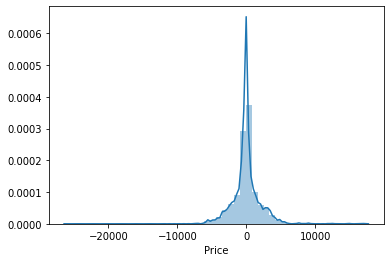

In [137]:
predict(RandomForestRegressor(),1)

#### play with multiple Algorithms

In [138]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9685134197428378
predictions are: 
 [11622. 13044.  8016. ...  3858.  8937.  6282.]


r2 score: 0.6741394214992276
MAE: 1408.7951099672437
MSE: 6130556.503440051
RMSE: 2475.996062888641


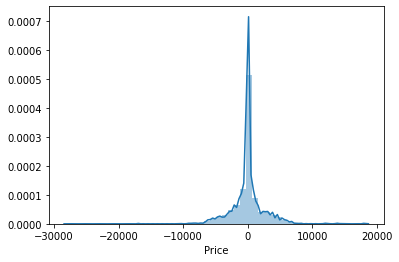

In [139]:
predict(DecisionTreeRegressor(),0)

Training score : 0.6218075684598243
predictions are: 
 [10690.53125 11651.       7835.40625 ...  3334.71875 11530.34375
  7610.5625 ]


r2 score: 0.5899807190639135
MAE: 1963.421195016378
MSE: 7713870.701523291
RMSE: 2777.3855874766996


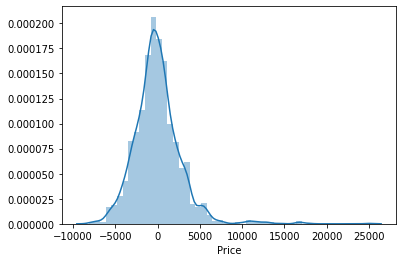

In [140]:
predict(LinearRegression(),0)

#### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [99]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [100]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [101]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [102]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [104]:
prediction=rf_random.predict(X_test)

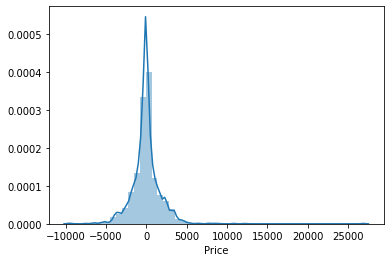

In [105]:
sns.distplot(y_test-prediction)

In [106]:
metrics.r2_score(y_test,prediction)

0.8403085124679607

In [107]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1110.6771600647069
MSE 3121555.2556893183
RMSE 1766.792363490775


##### Save the model to reuse it again

In [ ]:
!pip install pickle

In [108]:
import pickle

In [ ]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [111]:
# dump information to that file
pickle.dump(rf_random,file)

In [112]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [113]:
y_prediction=forest.predict(X_test)

In [114]:
y_prediction

array([11506.99156954, 13445.35137211, 11741.51764807, ...,
        6591.58536441,  4234.29701584,  6280.78887529])

In [115]:
metrics.r2_score(y_test,y_prediction)

0.8403085124679607